In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

from api_keys import api_key

from citipy import citipy 

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []
country_codes = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_name = city.city_name
    country_code = city.country_code
    
    if city_name not in cities:
        cities.append(city_name)
        country_codes.append(country_code)
        
print('The above script has generated {} different cities using random numbers.'.format(len(set(cities))))        

The above script has generated 633 different cities using random numbers.


In [9]:
df_countries = pd.DataFrame({'City': cities, 'Country': country_codes})

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Max Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
df_countries['Date'] = ''

city_count = 0


api_call_count = 1 
sets = 0 
t0 = time.time() 

for index,row in df_countries.iterrows():
    city_name = row['City']
    country_id = row['Country']
    
    
    search_parameters = {
        "q": str(city_name)+","+str(country_id),
        "units": "IMPERIAL",
        "mode": "json",
        "APPID": api_key
    }
    

    target_url = "http://api.openweathermap.org/data/2.5/weather"
    country_info = requests.get(target_url, params = search_parameters).json()

In [13]:
    try:
        df_countries.loc[index,'Latitude'] = country_info['coord']['lat']
        df_countries.loc[index,'Longitude'] = country_info['coord']['lon']
        df_countries.loc[index,'Max Temperature (F)'] = country_info['main']['temp_max']
        df_countries.loc[index,'Humidity (%)'] = country_info['main']['humidity']
        df_countries.loc[index,'Cloudiness (%)'] = country_info['clouds']['all']
        df_countries.loc[index,'Wind Speed (mph)'] = country_info['wind']['speed']
        df_countries.loc[index, 'Date'] = country_info['dt']
        
        print(f"Processing Record {api_call_count} of Set {sets} | {city_name}")
        
        city_count = city_count + 1
        
    except KeyError:
        df_countries.loc[index,'Latitude'] = np.nan
        df_countries.loc[index,'Longitude'] = np.nan
        df_countries.loc[index,'Max Temperature (F)'] = np.nan
        df_countries.loc[index,'Humidity (%)'] = np.nan
        df_countries.loc[index,'Cloudiness (%)'] = np.nan
        df_countries.loc[index,'Wind Speed (mph)'] = np.nan
        df_countries.loc[index,'Date'] = np.nan
        print(f"Missing weather information for city named: {city_name}")
    api_call_count = api_call_count + 1        
    if api_call_count == 51: 
        t1 = time.time()
        api_call_count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0 = time.time()                 

Missing weather information for city named: kudahuvadhoo


In [16]:
df_countries['Latitude'] = pd.to_numeric(df_countries['Latitude'])
df_countries['Longitude'] = pd.to_numeric(df_countries['Longitude'])
df_countries['Max Temperature (F)'] = pd.to_numeric(df_countries['Max Temperature (F)'])
df_countries['Humidity (%)'] = pd.to_numeric(df_countries['Humidity (%)'])
df_countries['Cloudiness (%)'] = pd.to_numeric(df_countries['Cloudiness (%)'])
df_countries['Wind Speed (mph)'] = pd.to_numeric(df_countries['Wind Speed (mph)'])

df_countries = df_countries.dropna()

df_countries = df_countries[["City", "Cloudiness (%)", "Country", "Date", "Humidity (%)","Latitude","Longitude",
                       "Max Temperature (F)", "Wind Speed (mph)"]]

print(df_countries.count()) 
print(df_countries.head(20)) 

City                   0
Cloudiness (%)         0
Country                0
Date                   0
Humidity (%)           0
Latitude               0
Longitude              0
Max Temperature (F)    0
Wind Speed (mph)       0
dtype: int64
Empty DataFrame
Columns: [City, Cloudiness (%), Country, Date, Humidity (%), Latitude, Longitude, Max Temperature (F), Wind Speed (mph)]
Index: []


NameError: name 'datetime' is not defined

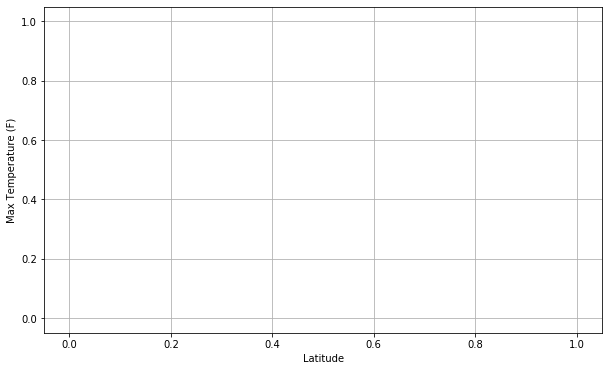

In [15]:
#Latitude vs Temperature
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Max Temperature (F)"], color='b', alpha=0.5)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature ({datetime.datetime.now().strftime("%D")})')
plt.show()

NameError: name 'datetime' is not defined

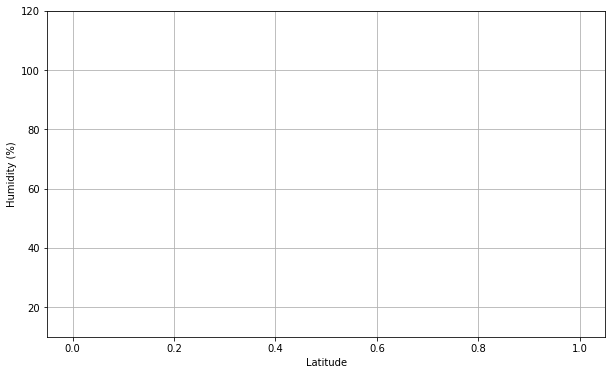

In [17]:
#Latitude vs Humidity
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Humidity (%)"], color='blue', alpha=0.5)
plt.ylim(10,120)
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity ({datetime.datetime.now().strftime("%D")})')
plt.show()

ValueError: Axis limits cannot be NaN or Inf

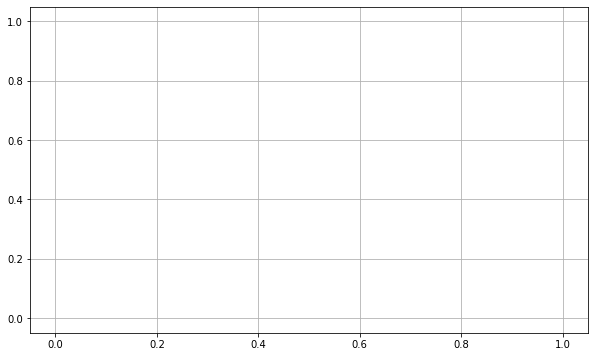

In [18]:
#Latitude vs Cloudiness
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Cloudiness (%)"], color='b', alpha=0.5)
plt.grid()
plt.ylim(-20,(df_countries["Cloudiness (%)"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness ({datetime.datetime.now().strftime("%D")})')
plt.show()

ValueError: Axis limits cannot be NaN or Inf

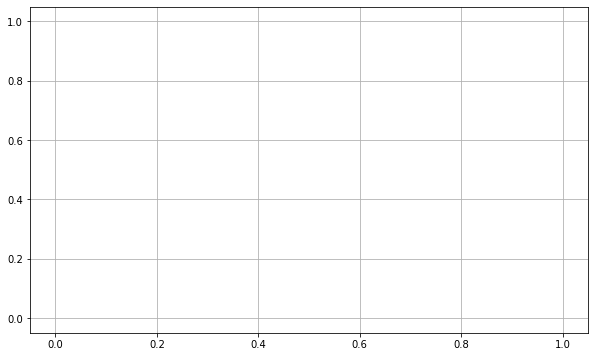

In [19]:
#Latitude vs Wind Speed
plt.figure(figsize=(10,6))
plt.scatter(df_countries["Latitude"], df_countries["Wind Speed (mph)"], color='blue', alpha=0.5)
plt.grid()
plt.ylim((df_countries["Wind Speed (mph)"].min()-5),(df_countries["Wind Speed (mph)"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed ({datetime.datetime.now().strftime("%D")})')
plt.show()